# Data Cleaning Starring NBA Shot Log Data: Part III

## Data Cleaning (Continued)

From part 2 we made some of the columns more clear and interpretable. We'll load the dataset below

In [99]:
import pandas as  pd
import os

pd.set_option('display.max_columns', 30)

parent_path = os.path.dirname(os.path.dirname(os.getcwd()))

replace_double_slash = parent_path.replace('\\', '/')

data_path = replace_double_slash + '/data/shot_logs_clean_2.csv'

nba_step_3 = pd.read_csv(data_path)

In [100]:
nba_step_3.head()

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,W,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,1,1,1:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,2,1,0:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,3,1,0:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,4,2,11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,2015-03-04,BKN,CHA,CHA,BKN,W,24,5,2,10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Since we were able to extract the winning team in the third column, we don't really need the W column anymore and can remove it

In [101]:
nba_step_3.drop('W', axis='columns', inplace=True)

nba_step_3.head()

nba_step_3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 128069 entries, 0 to 128068
Data columns (total 23 columns):
Game Id                       128069 non-null int64
Date                          128069 non-null object
Home Team                     128069 non-null object
Away Team                     128069 non-null object
Winning Team                  128069 non-null object
Losing Team                   128069 non-null object
Final Margin                  128069 non-null int64
Shot Number                   128069 non-null int64
Period                        128069 non-null int64
Game Clock                    128069 non-null object
Shot Clock                    122502 non-null float64
Dribbles                      128069 non-null int64
Touch Time                    128069 non-null float64
Shot Dist                     128069 non-null float64
Pts Type                      128069 non-null int64
Shot Result                   128069 non-null object
Closest Defender              128069 non-nul

Now we're going to focus on handling the missing values in the shot clock column and how to impute those values. For the sake of ease of interpretation, we will get do the following

1. Get the list of unique game IDs
2. Use Numpy's random module to get 10 random game IDs
3. Filter data frame on these game IDs

For the sake of replicability, the seed is set to 42 (because...42. If you want to experiment and are not worried about a difference in results, feel free to not set the seed or to whatever seed you want and continue)


In [102]:
import numpy as np

Game_ID_List = nba_step_3['Game Id'].unique()

np.random.seed(42)

random_10_game_ids = np.random.choice(Game_ID_List, size=10)

In [103]:
Ten_Games = nba_step_3[nba_step_3["Game Id"].isin(random_10_game_ids)].copy()

Ten_Games.sort_values('Game Id', inplace = True)

Ten_Games.reset_index(drop=True, inplace=True)

print(random_10_game_ids)

Ten_Games.head()

[21400314 21400227 21400505 21400301 21400251 21400812 21400378 21400549
 21400357 21400037]


,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,12,2,4:07,5.2,1,2.3,2.4,2,missed,"Len, Alex",203458,1.2,0,0,derrick favors,202324
1,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,5,3,9:14,14.4,0,1.8,3.2,2,made,"Morris, Markieff",202693,2.9,1,2,trevor booker,202344
2,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,6,4,9:04,17.4,0,1.0,24.8,3,missed,"Morris, Markieff",202693,6.9,0,0,trevor booker,202344
3,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,7,4,8:35,24.0,0,0.0,1.1,2,made,"Green, Gerald",101123,1.1,1,2,trevor booker,202344
4,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,8,4,7:00,2.6,2,2.4,3.9,2,made,"Morris, Marcus",202694,2.7,1,2,trevor booker,202344


In [104]:
missing_shot_clock = Ten_Games[Ten_Games['Shot Clock'].isnull()].copy()

missing_shot_clock.head()

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
33,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,14,3,0:05,NaN,1,1.5,5.9,2,missed,"Len, Alex",203458,1.2,0,0,gordon hayward,202330
43,21400037,2014-11-01,UTA,PHX,UTA,PHX,27,9,2,0:02,NaN,0,0.7,23.1,3,missed,"Len, Alex",203458,18.5,0,0,trey burke,203504
95,21400037,2014-11-01,UTA,PHX,UTA,PHX,-27,14,3,0:00,NaN,1,2.0,33.8,3,missed,"Hood, Rodney",203918,8.6,0,0,gerald green,101123
152,21400227,2014-11-28,TOR,DAL,DAL,TOR,-4,22,4,0:03,NaN,4,3.8,26.7,3,missed,"Barea, Jose Juan",200826,3.8,0,0,kyle lowry,200768
165,21400227,2014-11-28,TOR,DAL,DAL,TOR,-4,21,4,0:10,NaN,5,4.8,4.2,2,made,"Crowder, Jae",203109,0.0,1,2,kyle lowry,200768


So, some basketball knowledge (for those unfamiliar). The shot clock runs for 24 seconds on any given play. Why is this important? Take a look at game clock. Immediately, you'll notice the following

* **The game clock in the head of the data above seems to run under 24 seconds**

Why does that matter? If the game clock is under 24 seconds, the game clock = shot clock! Which may explain why the data is missing But let's verify by plotting the distribution of the time patterns for this data (using pandas native plotting features)

In [105]:
from matplotlib import pyplot as plt
%matplotlib inline  

val_1 = pd.to_datetime(missing_shot_clock['Game Clock'], format="%M:%S").dt.time

string_val_1 = val_1.astype(str)

string_val_1

timedelta_obj = pd.to_timedelta(string_val_1, unit='m')

timedelta_obj.iloc[0].total_seconds()

missing_shot_clock["Game Clock"] = timedelta_obj

In [106]:
times = np.array(missing_shot_clock['Game Clock'])

seconds = times / np.timedelta64(1, 's')

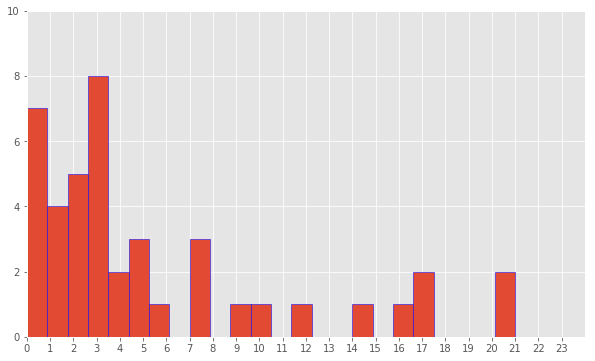

In [107]:
plt.style.use('ggplot')

fig = plt.figure(figsize=(10,6))

ax = fig.add_subplot(111)

ax.set_xlim((0,24))

ax.set_xticks(np.arange(24))

ax.set_ylim((0, 10))

plt.hist(seconds, edgecolor='blue', align='mid', bins=24)

plt.show()

So based on the initial random data, we notice that the distribution of game clock data is less than 24 whenver shot clock is missing. So it seems to be that we can impute the missing values of shot clock to be to the corresponding game clock value. Now we'll use the whole data subset that contains missing shot clock information to verify

In [108]:
all_missing = nba_step_3[nba_step_3['Shot Clock'].isnull()].copy()

In [109]:
val_1 = pd.to_datetime(all_missing['Game Clock'], format="%M:%S").dt.time

string_val_1 = val_1.astype(str)

timedelta_obj = pd.to_timedelta(string_val_1)

all_missing["Game Clock"] = timedelta_obj

Before we plot, let's check to make sure that our theory holds true. Let's sort the data frame by decreasing times

In [110]:
sorted_times = all_missing.sort_values("Game Clock", ascending=False)

sorted_times.reset_index(drop=True, inplace=True)

sorted_times.head()

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400088,2014-11-08,MIL,MEM,MIL,MEM,1,7,4,00:11:52,NaN,1,3.4,7.1,2,missed,"Leuer, Jon",202720,2.1,0,0,giannis antetokounmpo,203507
1,21400115,2014-11-12,DEN,POR,POR,DEN,-17,6,4,00:11:51,NaN,0,1.2,25.7,3,missed,"Barton, Will",203115,6.9,0,0,danilo gallinai,201568
2,21400088,2014-11-08,MIL,MEM,MIL,MEM,-1,5,3,00:11:51,NaN,0,0.0,22.0,2,missed,"Middleton, Khris",203114,5.3,0,0,marc gasol,201188
3,21400616,2015-01-19,MEM,DAL,DAL,MEM,8,14,4,00:11:50,NaN,0,0.9,19.5,2,missed,"Lee, Courtney",201584,6.6,0,0,mnta ellis,101145
4,21400300,2014-12-07,LAL,NOP,NOP,LAL,-17,4,2,00:11:50,NaN,0,0.8,3.4,2,made,"Anderson, Ryan",201583,3.3,1,2,carlos boozer,2430


Wait a second, the highest time is 11 minutes and 50 seconds? 

Looking further into the data you'll notice that various times from 11:50 to 1 second have missing data. 

So, we might have to change our approach. Let's see the percentage of missing information with game clock greater than 24 vs less than 24 seconds.

In [111]:
all_times = np.array(all_missing['Game Clock'])

less_eq_24 = all_times[np.where((all_times/np.timedelta64(1,'s')) <= 24)]

ge_24 = all_times[np.where((all_times/np.timedelta64(1,'s')) > 24)]


print('Number of times times when missing data had Game Clock of less than or equal to 24 seconds: ' + str(len(less_eq_24)))

print('Number of times times when missing data had Game Clock greater than 24 seconds: ' + str(len(ge_24)) + ('\n'))

total_rows = nba_step_3.shape[0]

print('Percentage of total data of the first critera: ' + '{:.2%}'.format(len(less_eq_24)/total_rows))
print('Percentage of total data of the second critera: ' + '{:.2%}'.format(len(ge_24)/total_rows) + "\n")

print('Percentage of missing shot clock data that had game clock with less than or equal to 24 seconds: ' + '{:.2%}'.format(len(less_eq_24)/len(all_times)))
print('Percentage of missing shot clock data that had game clock with greater than 24 seconds: ' + '{:.2%}'.format(len(ge_24)/len(all_times)))



Number of times times when missing data had Game Clock of less than or equal to 24 seconds: 3554
Number of times times when missing data had Game Clock greater than 24 seconds: 2013

Percentage of total data of the first critera: 2.78%
Percentage of total data of the second critera: 1.57%

Percentage of missing shot clock data that had game clock with less than or equal to 24 seconds: 63.84%
Percentage of missing shot clock data that had game clock with greater than 24 seconds: 36.16%


So for about 64% of our missing cases, we can impute the shot clock data to be equivalent to the game clock data. So what can we do with the other set? It's about 1.6 % of the total data, so it's fair to say we can delete it. For reference, let's go back to the orginal data set and format the game clock column like we did when looking at just the missing data. To make life easier we'll also change the type of the Date column to be a date type

In [112]:
nba_step_3['Date'] = pd.to_datetime(nba_step_3['Date'], format='%Y-%m-%d')

intermediate = pd.to_datetime(nba_step_3['Game Clock'], format="%M:%S").dt.time

intermediate = intermediate.astype(str)

nba_step_3['Game Clock'] = intermediate

nba_step_3['Game Clock'] = pd.to_timedelta(nba_step_3['Game Clock'])

So first, we'lll remove the values that have missing shot clock data and game clock times greater than 24 seconds

In [113]:
nba_remove_step_1 = nba_step_3[~((nba_step_3['Shot Clock'].isnull()) & (nba_step_3['Game Clock'].dt.total_seconds() > 24))]

nba_remove_step_1.head()

,Game Id,Date,Home Team,Away Team,Winning Team,Losing Team,Final Margin,Shot Number,Period,Game Clock,Shot Clock,Dribbles,Touch Time,Shot Dist,Pts Type,Shot Result,Closest Defender,Closest Defender Player Id,Close Def Dist,Fgm,Pts,Player Name,Player Id
0,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,1,1,00:01:09,10.8,2,1.9,7.7,2,made,"Anderson, Alan",101187,1.3,1,2,brian roberts,203148
1,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,2,1,00:00:14,3.4,0,0.8,28.2,3,missed,"Bogdanovic, Bojan",202711,6.1,0,0,brian roberts,203148
2,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,3,1,00:00:00,NaN,3,2.7,10.1,2,missed,"Bogdanovic, Bojan",202711,0.9,0,0,brian roberts,203148
3,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,4,2,00:11:47,10.3,2,1.9,17.2,2,missed,"Brown, Markel",203900,3.4,0,0,brian roberts,203148
4,21400899,2015-03-04,BKN,CHA,CHA,BKN,24,5,2,00:10:34,10.9,2,2.7,3.7,2,missed,"Young, Thaddeus",201152,1.1,0,0,brian roberts,203148


Now we can impute the missing shot clock values with the value of seconds in game clock

In [114]:
nba_imputed = nba_remove_step_1[:]

shot_clock = nba_imputed['Shot Clock']

imputed_values = shot_clock.replace([np.nan], [nba_imputed['Game Clock'].dt.total_seconds()])

nba_imputed['Shot Clock'] = imputed_values.astype(float)

nba_imputed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 126056 entries, 0 to 128068
Data columns (total 23 columns):
Game Id                       126056 non-null int64
Date                          126056 non-null datetime64[ns]
Home Team                     126056 non-null object
Away Team                     126056 non-null object
Winning Team                  126056 non-null object
Losing Team                   126056 non-null object
Final Margin                  126056 non-null int64
Shot Number                   126056 non-null int64
Period                        126056 non-null int64
Game Clock                    126056 non-null timedelta64[ns]
Shot Clock                    126056 non-null float64
Dribbles                      126056 non-null int64
Touch Time                    126056 non-null float64
Shot Dist                     126056 non-null float64
Pts Type                      126056 non-null int64
Shot Result                   126056 non-null object
Closest Defender           

Now that we've imputed all the missing values, our dataset is almost ready to go. In the next notebook, we'll make some final formatting adjustments to the final data and we should be good (the Player Name and Closest Defender Column)

In [115]:
nba_clean_step_3 = nba_imputed[:]

save_path = replace_double_slash + '/data/shot_logs_clean_3.csv'

nba_clean_step_3.to_csv(save_path, index=False)